In [10]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch
from torchvision import transforms
import cv2

In [11]:
model_path = "../model/hgr-psl/checkpoint-574"
model = ViTForImageClassification.from_pretrained(model_path)
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

c:\Users\aaron\Desktop\Programacion\proyecto_jic\.venv\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [12]:
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

Text(0.5, 1.0, 'Ejemplo: CH')

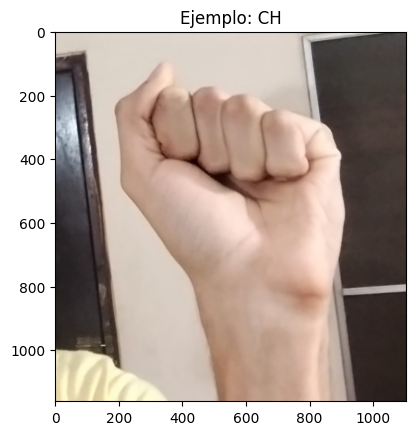

In [13]:
import numpy as np
import matplotlib.pyplot as plt
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

def returned_image(image_path):
    image = Image.open(image_path)
    image = preprocess(image)
    image = image.unsqueeze(0)
    return image


def cv2_image(image_path):
    image = cv2.imread(image_path)
    return image[:,:,::-1]

path_1 = "psl_1.jpeg"
path_2 = "psl_2.jpg"
path_3 = "psl_3.jpg"

image_1 = returned_image(path_1)
image_2 = returned_image(path_2)
image_3 = returned_image(path_3)

plt.imshow(cv2_image(path_1))
plt.title("Ejemplo: CH")

Text(0.5, 1.0, 'Ejemplo: M')

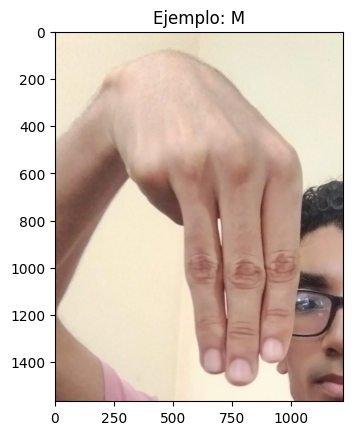

In [14]:
plt.imshow(cv2_image(path_2))
plt.title("Ejemplo: M")

Text(0.5, 1.0, 'Ejemplo: N')

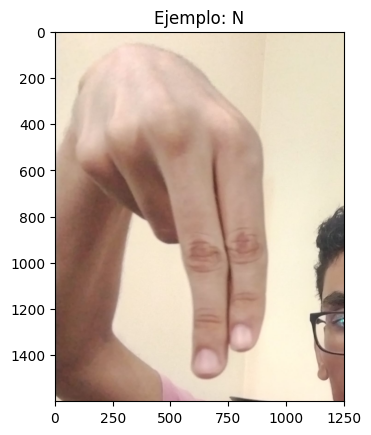

In [15]:
plt.imshow(cv2_image(path_3))
plt.title("Ejemplo: N")

In [16]:
import os
from pathlib import Path
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
classes = [label for label in os.listdir(Path("..\\datasets\PSL\PSL_train"))]
image_1 = image_1.to(device)

In [17]:
from torch.nn import functional as F
with torch.no_grad():
    outputs = model(image_1)



probabilities= F.softmax(outputs.logits,dim=1)
predicted_class = probabilities.argmax(-1).item()
prediction = probabilities[0,predicted_class].item()
print(f"Clase predicha: {predicted_class}")

Clase predicha: 0


Text(0.5, 1.0, 'Clase predicha A_PSL con probabilidad 0.21214470267295837')

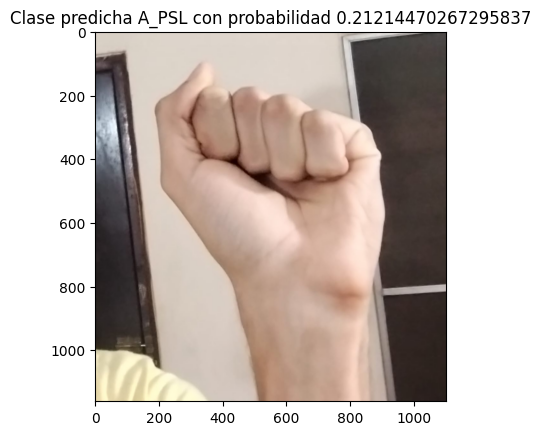

In [18]:
plt.imshow(cv2_image(path_1))
plt.title(f"Clase predicha {classes[predicted_class]} con probabilidad {prediction}")